Number of samples: 285
Mean of Erosion Volsum over count for LM2: -0.6401417675757575
Standard Deviation of Erosion Volsum over count for LM2: 0.2500899025496915
Mean Squared Error: 0.06452156842310489


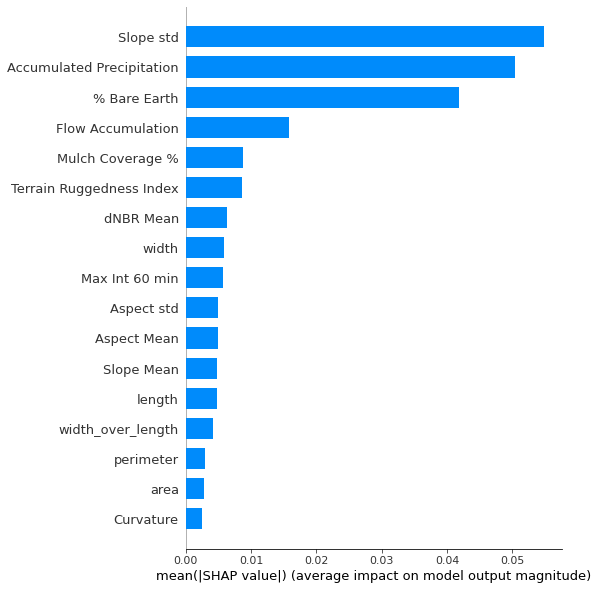

Mean of Erosion Volsum over count for LPM: -0.7259450145128206
Standard Deviation of Erosion Volsum over count for LPM: 0.3462606995320519
Mean Squared Error: 0.12325341924445563


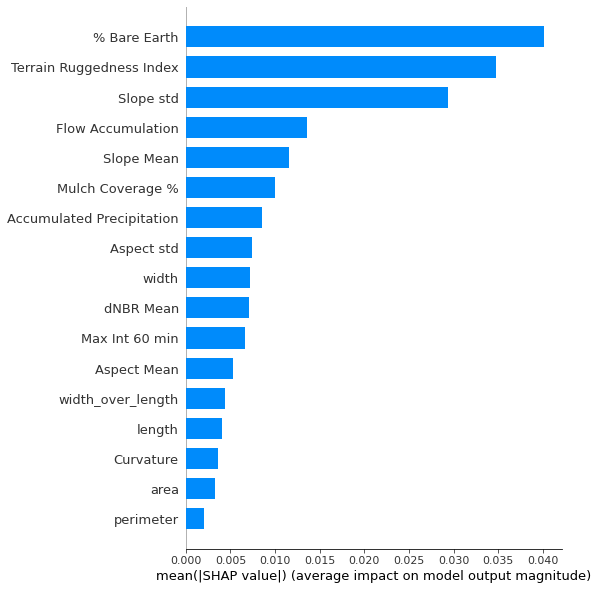

Mean of Erosion Volsum over count for MPM: -0.3551635665285714
Standard Deviation of Erosion Volsum over count for MPM: 0.1996879328743608
Mean Squared Error: 0.08963691987278392


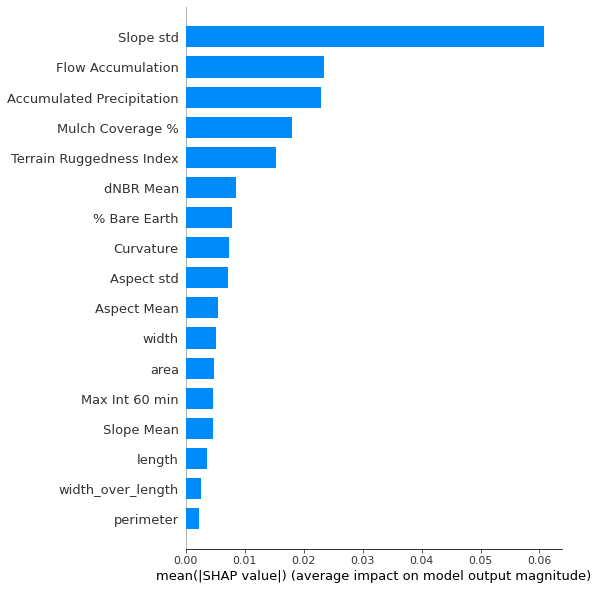

Mean of Erosion Volsum over count for MM: -0.550665983469697
Standard Deviation of Erosion Volsum over count for MM: 0.17287931281186578
Mean Squared Error: 0.0346633164535444


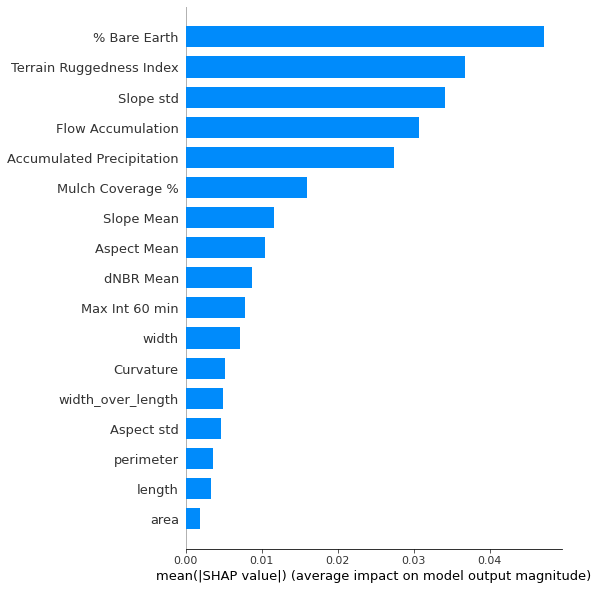

Mean of Erosion Volsum over count for UM1: -0.4608381940000001
Standard Deviation of Erosion Volsum over count for UM1: 0.06593293253280681
Mean Squared Error: 0.015353876640329488


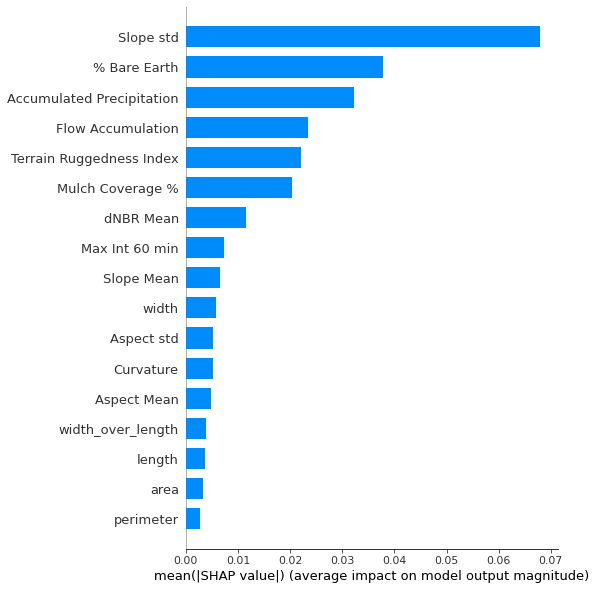

Mean of Erosion Volsum over count for UM2: -0.5559438788974358
Standard Deviation of Erosion Volsum over count for UM2: 0.4045014127024226
Mean Squared Error: 0.18025647794643193


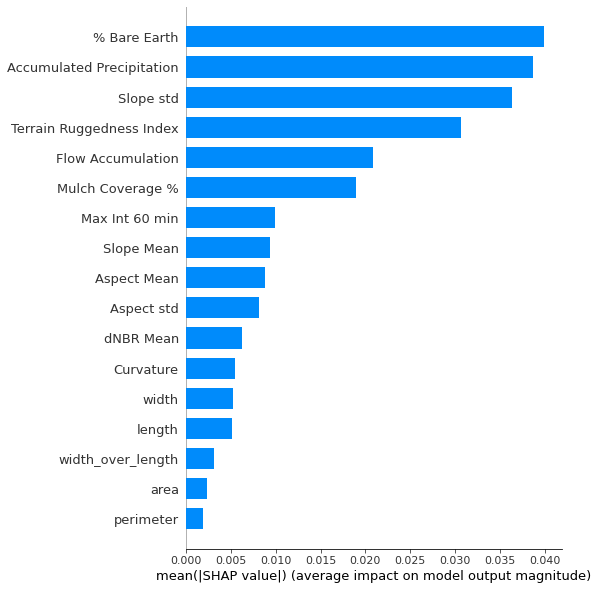

In [15]:
import RF_utils as rfut
from RF_feature_importance import evaluate_model_with_shap  # Assuming SHAP evaluation is defined here
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.inspection import plot_partial_dependence
# Load your data (modify this part with real data loading)
csv_fn = r"Y:\ATD\GIS\East_Troublesome\Watershed Statistical Analysis\Watershed Stats\Hillslopes\Stream Clipped Hillslopes Pruned\Hillslope_Stats_Combined 050224.csv"
variables_to_exclude = ['ID', 'Erosion mean', "Category",	"OBJECTID", "Deposition mean",	"Deposition stdev",	"Erosion stdev",
                    "Deposition mean Masked",	"Deposition stdev Masked",	"Erosion mean Masked",	"Erosion stdev Masked", 'Erosion Volsum Masked',	
                    'Erosion Volsum Masked Count',	'Erosion Volsum over count', 'Deposition Volsum Masked',	'Deposition Volsum Masked Count', "width", "length", "Terrain Ruggedness Index"] #,	"Watershed"

y_field = 'Erosion Volsum over count'
watershed_values = ['LM2', 'LPM', "MPM", 'MM', 'UM1', 'UM2']

def load_data(file_path, exclude_vars, y_var):
    data = pd.read_csv(file_path)
    #drop rows where Erosion Volsum Masked Count is less than 10
    data = data[data['Erosion Volsum Masked Count'] >= 1]
    X = data.drop(columns=exclude_vars)
    y = data[y_var].dropna()
    X = X.loc[y.index]
    #X = pd.get_dummies(X)  # Convert categorical columns to dummy variables
    return X, y

# Load and prepare data
# Using specific watershed data if watershed_value is defined, else load all data
X, y = load_data(csv_fn, variables_to_exclude, y_field)
print(f"Number of samples: {len(X)}")
# Split the data into training and test sets
#rfut.tune_and_evaluate_model(X,y)
for watershed_value in watershed_values:
    #X_train is equal to all values where Watershed is not equal to watershed_value
    X_train = X[X['Watershed'] != watershed_value]
    y_train = y.loc[X_train.index]
    X_train = X_train.drop(columns=['Watershed'])
    #X_test is equal to all values where Watershed is equal to watershed_valu
    X_test = X[X['Watershed'] == watershed_value]
    y_test = y.loc[X_test.index]
    X_test = X_test.drop(columns=['Watershed'])


    # Train the model
    model = RandomForestRegressor(n_estimators=350, max_depth=18, min_samples_split=5, random_state=42)
    model.fit(X_train, y_train)
    print(f"Mean of {y_field} for {watershed_value}: {y_test.mean()}")
    print(f"Standard Deviation of {y_field} for {watershed_value}: {y_test.std()}")
    rfut.evaluate_model(model, X_test, y_test)
    # Evaluate the model with SHAP
    evaluate_model_with_shap(model, X_train, X_test)


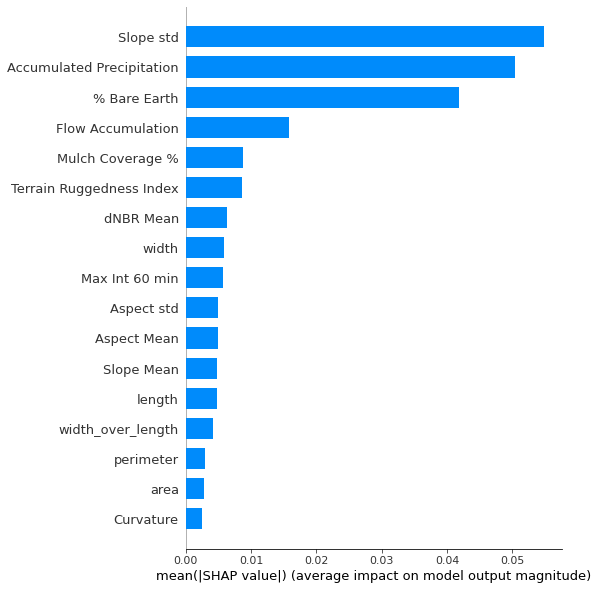

In [10]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X_train is equal to all values where Watershed is not equal to watershed_value
X_train = X[X['Watershed'] != watershed_value]
y_train = y.loc[X_train.index]
X_train = X_train.drop(columns=['Watershed'])
#X_test is equal to all values where Watershed is equal to watershed_valu
X_test = X[X['Watershed'] == watershed_value]
y_test = y.loc[X_test.index]
X_test = X_test.drop(columns=['Watershed'])


# Train the model
model = RandomForestRegressor(n_estimators=350, max_depth=18, min_samples_split=5, random_state=42)
model.fit(X_train, y_train)

rfut.evaluate_model(model, X_test, y_test)
# Evaluate the model with SHAP
evaluate_model_with_shap(model, X_train, X_test)


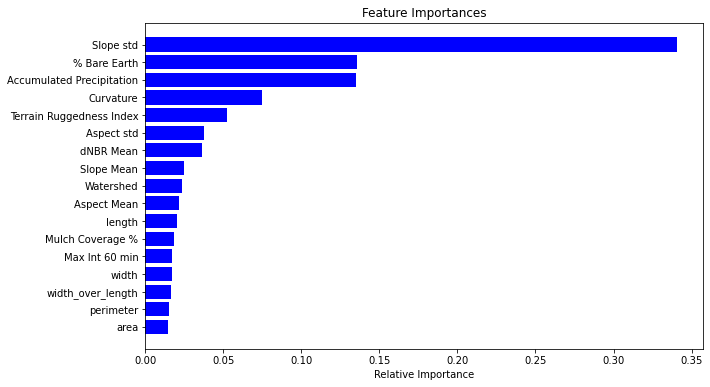

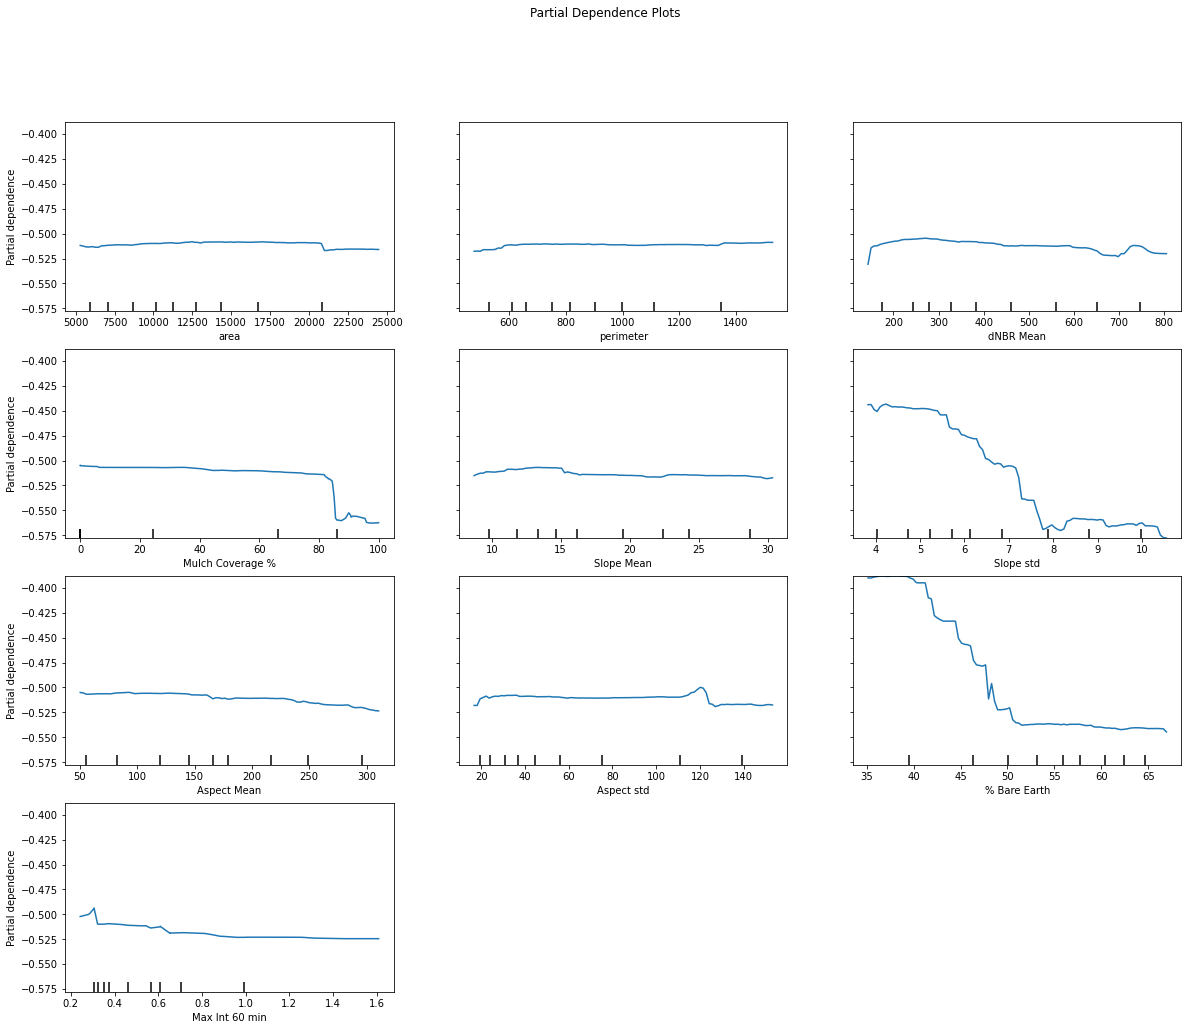

In [11]:
rfut.plot_feature_importances(model, X.columns)

feature_list = range(0,10)
rfut.partial_dependence_plots(model, X_train, feature_list)

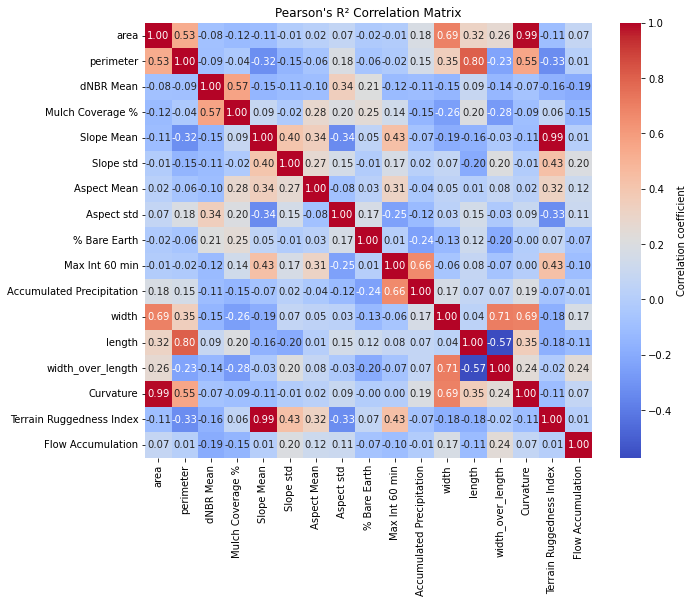

,area,perimeter,dNBR Mean,Mulch Coverage %,Slope Mean,Slope std,Aspect Mean,Aspect std,% Bare Earth,Max Int 60 min,Accumulated Precipitation,width,length,width_over_length,Curvature,Terrain Ruggedness Index,Flow Accumulation
area,1.000000,0.527437,-0.081147,-0.118545,-0.107327,-0.011479,0.022241,0.071559,-0.023043,-0.011057,0.177311,0.693761,0.318028,0.264277,0.988468,-0.105243,0.074623
perimeter,0.527437,1.000000,-0.089966,-0.036808,-0.322674,-0.152845,-0.063748,0.184538,-0.057767,-0.024856,0.153028,0.347976,0.804299,-0.228958,0.552210,-0.329758,0.011670
dNBR Mean,-0.081147,-0.089966,1.000000,0.569248,-0.146222,-0.111455,-0.100668,0.343677,0.213617,-0.123235,-0.109234,-0.146362,0.089174,-0.139394,-0.072391,-0.163422,-0.193791
Mulch Coverage %,-0.118545,-0.036808,0.569248,1.000000,0.086286,-0.019455,0.276235,0.196154,0.249815,0.140343,-0.145800,-0.257032,0.200150,-0.276805,-0.093945,0.061867,-0.150773
Slope Mean,-0.107327,-0.322674,-0.146222,0.086286,1.000000,0.404922,0.343581,-0.336059,0.052122,0.429161,-0.071396,-0.187339,-0.160995,-0.028261,-0.105697,0.994282,0.009186
Slope std,-0.011479,-0.152845,-0.111455,-0.019455,0.404922,1.000000,0.266346,0.153417,-0.009095,0.170552,0.021611,0.072480,-0.199208,0.204034,-0.007675,0.429957,0.199778
Aspect Mean,0.022241,-0.063748,-0.100668,0.276235,0.343581,0.266346,1.000000,-0.084824,0.025938,0.312379,-0.037846,0.047191,0.009256,0.075510,0.024230,0.322243,0.119111
Aspect std,0.071559,0.184538,0.343677,0.196154,-0.336059,0.153417,-0.084824,1.000000,0.165027,-0.245655,-0.117573,0.030706,0.151237,-0.030009,0.092208,-0.327203,0.109446
% Bare Earth,-0.023043,-0.057767,0.213617,0.249815,0.052122,-0.009095,0.025938,0.165027,1.000000,0.010663,-0.243655,-0.129124,0.116009,-0.202119,-0.004209,0.069238,-0.073584
Max Int 60 min,-0.011057,-0.024856,-0.123235,0.140343,0.429161,0.170552,0.312379,-0.245655,0.010663,1.000000,0.664481,-0.059277,0.076480,-0.074047,0.003868,0.434860,-0.102824


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def correlation_matrix_table(features_df):
    """
    Calculate and display a correlation matrix with Pearson's R^2 for all features.

    Parameters:
    - features_df (pd.DataFrame): DataFrame containing all the features.

    Returns:
    - Displays a heatmap of the correlation matrix.
    """
    # Calculate the Pearson correlation matrix
    corr_matrix = features_df.corr()
    
    # Create a heatmap to visualize the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
    plt.title("Pearson's R² Correlation Matrix")
    plt.show()

    return corr_matrix

correlation_matrix_table(X_train)